In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt 
import scipy as sp

In [2]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [3]:
train = train.drop(columns=['registered', 'casual'])

In [4]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,129


In [5]:
test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981


# datetime 처리

In [6]:
train['datetime'] = pd.to_datetime(train['datetime'])
test['datetime'] = pd.to_datetime(test['datetime'])

In [7]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second
# dayofweek 는 요일을 가져오는 말
#월(0) 화(1) 수(2) 목(3) 금(4) 토(5) 일(6)
train['dayofweek'] = train['datetime'].dt.dayofweek

test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour
test['minute'] = test['datetime'].dt.minute
test['second'] = test['datetime'].dt.second
# dayofweek 는 요일을 가져오는 말
#월(0) 화(1) 수(2) 목(3) 금(4) 토(5) 일(6)
test['dayofweek'] = test['datetime'].dt.dayofweek

In [8]:
train['year'] = train['datetime'].dt.year

In [9]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,2011,1,1,4,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,336,2012,12,19,19,0,0,2
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,241,2012,12,19,20,0,0,2
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,168,2012,12,19,21,0,0,2
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,129,2012,12,19,22,0,0,2


In [10]:
test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,minute,second,dayofweek
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,0,0,3
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1,0,0,3
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2,0,0,3
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,0,0,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,2012,12,31,19,0,0,0
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,2012,12,31,20,0,0,0
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,2012,12,31,21,0,0,0
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,2012,12,31,22,0,0,0


# EDA

## 연, 월, 일, 계절별 자전거 수요량

<AxesSubplot:xlabel='year', ylabel='count'>

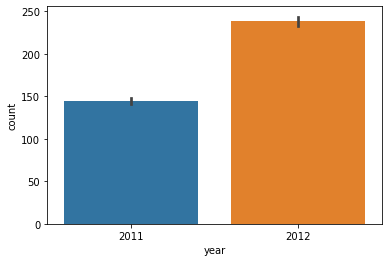

In [11]:
sns.barplot(data=train, x='year', y='count')

<AxesSubplot:xlabel='month', ylabel='count'>

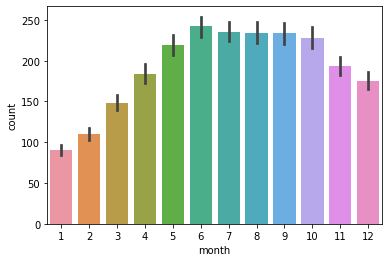

In [12]:
sns.barplot(data=train, x='month', y='count')

<AxesSubplot:xlabel='day', ylabel='count'>

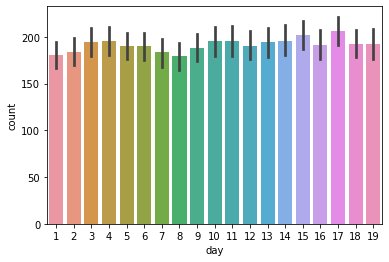

In [13]:
sns.barplot(data=train, x='day', y='count')

<AxesSubplot:xlabel='season', ylabel='count'>

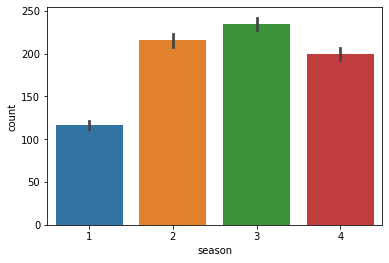

In [14]:
sns.barplot(data=train, x='season', y='count')

In [15]:
print(train[train['season'] == 1].month.unique())
print(train[train['season'] == 2].month.unique())
print(train[train['season'] == 3].month.unique())
print(train[train['season'] == 4].month.unique())

[1 2 3]
[4 5 6]
[7 8 9]
[10 11 12]


In [16]:
print(train[train['weather'] == 1].weather.unique())
print(train[train['weather'] == 2].weather.unique())
print(train[train['weather'] == 3].weather.unique())
print(train[train['weather'] == 4].weather.unique())

[1]
[2]
[3]
[4]


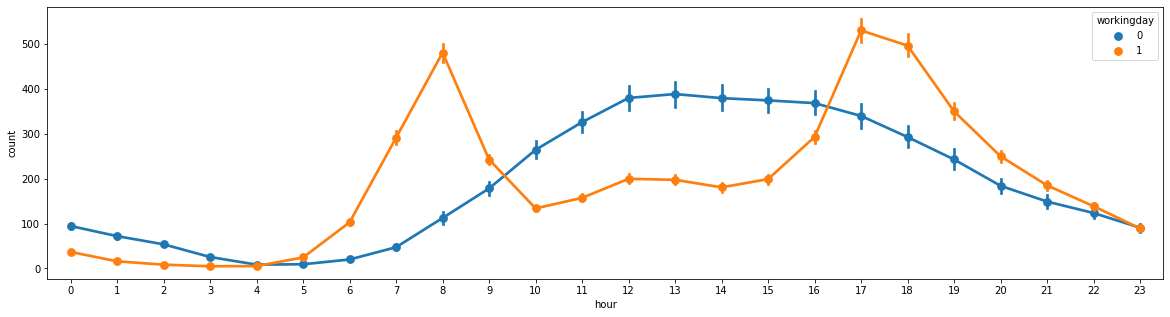

In [17]:
# fig, ax1 = plt.subplot(1, 1)

# fig.set_size_inches(20, 5) # 가로,세로
plt.figure(figsize=(20, 5))
sns.pointplot(data = train, x='hour', y='count', hue='workingday')
plt.show()

# 근무일에는 출퇴근 시간에 수요량 급증, 근무일이 아닐 때에는 오후시간대에 수요량 급증 -> 'workingday', 'holiday' 여부도 판단!

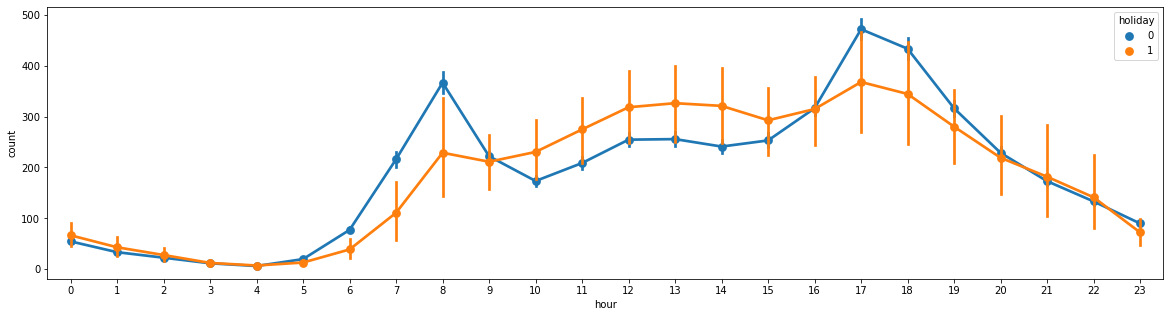

In [18]:
plt.figure(figsize=(20, 5))
sns.pointplot(data = train, x='hour', y='count', hue='holiday')
plt.show()

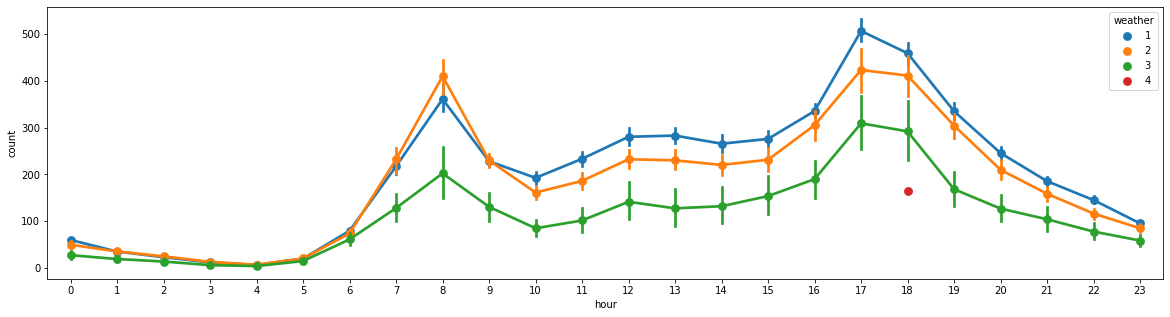

In [19]:
plt.figure(figsize=(20, 5))
sns.pointplot(data = train, x='hour', y='count', hue='weather')
plt.show()

# 1, 2번 날씨 > 3번 날씨 > 4번 날씨

In [ ]:
plt.figure(figsize=(20, 5))
sns.pointplot(data = train, x='hour', y='count', hue='dayofweek')
plt.show()

## 독립변수들간의 상관관계

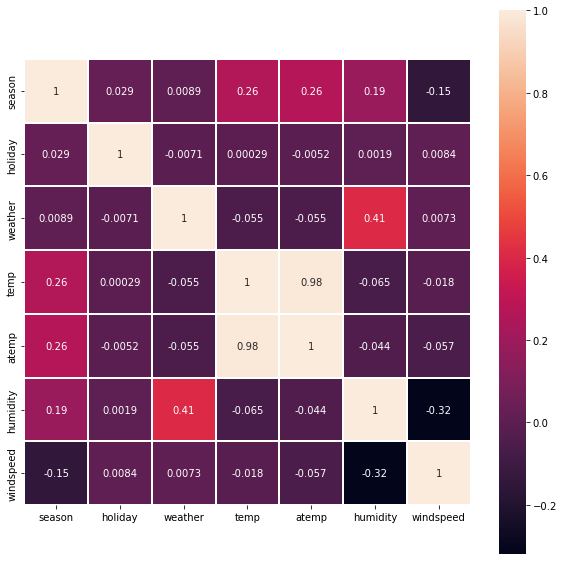

In [22]:
corr_vars = [
    'datetime',
    'season',
    'holiday',
    'weather',
    'temp',
    'atemp',
    'humidity',
    'windspeed'
]
corr_data = train[corr_vars]
plt.figure(figsize=(10, 10))
sns.heatmap(
    corr_data.corr(),
    linewidths=0.1,
    square=True,
    annot=True,
)
plt.show()
# temp와 atemp변수의 상관관계가 매우 높으므로, temp만 사용한다.

## 온도, 습도, 바람세기

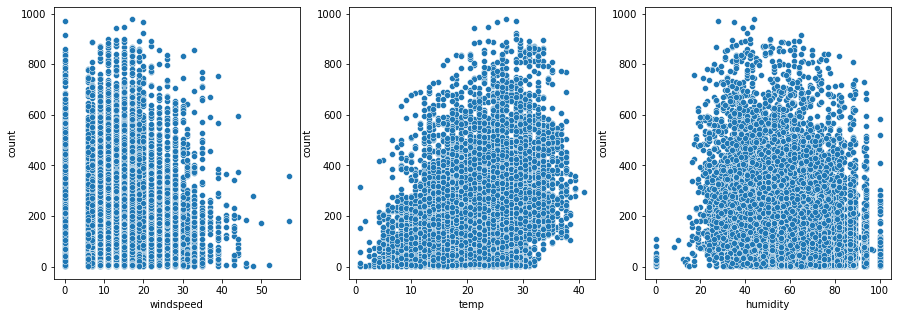

In [23]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize=(15,5))

sns.scatterplot(data = train, x = 'windspeed', y = 'count', ax = ax1)
sns.scatterplot(data = train, x = 'temp', y = 'count', ax = ax2)
sns.scatterplot(data = train, x = 'humidity', y =  'count', ax = ax3)
plt.show()

# windspeed가 0인 경우가 있나...?
# 결측치로 생각하여 대체하자.

# Feature Engineering

### 이상치 제거

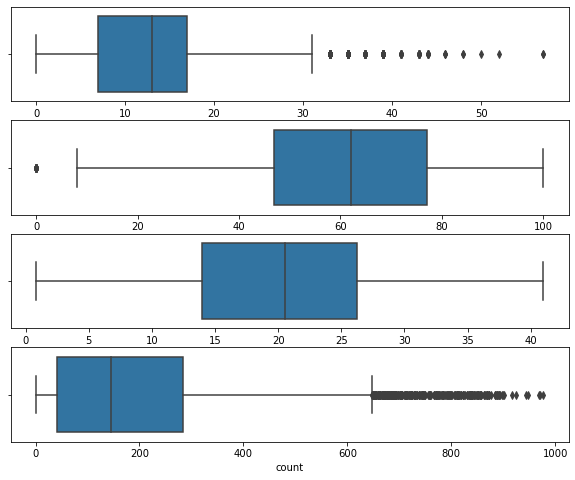

In [24]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize = (10, 8))
sns.boxplot(data=train, x='windspeed', ax=ax1)
sns.boxplot(data=train, x='humidity', ax=ax2)
sns.boxplot(data=train, x='temp', ax=ax3)
sns.boxplot(data=train, x='count', ax=ax4)
plt.show()

In [25]:
def detect_outliers(data, cols):
    out_idxs = []
    for col in cols:
        q1 = np.percentile(data[col], 25)
        q3 = np.percentile(data[col], 75)
        iqr = q3-q1
        outlier_cols = data[(data[col] < q1-1.5*iqr) | (data[col] > q3+1.5*iqr)].index
        out_idxs.extend(outlier_cols)
    
    return out_idxs

drop_idxs = detect_outliers(train,["temp", "atemp", "humidity", "windspeed", "count"])
train.shape

(10886, 17)

In [26]:
train = train.drop(drop_idxs, axis=0).reset_index(drop=True)
train.shape

(10348, 17)

### 왜도와 첨도 확인
- 왜도
    - 데이터의 분포가 한쪽으로 쏠린것을 의미
    - skew의 수치가 -2~+2 정도가 되어야 치우침이 없는 데이터
    - -2이하는 왼쪽으로 쏠린 데이터 (negative) +2 이상은 오른쪽으로 쏠린 데이터(positive)
    - positive일경우 변환방법 : square root, cube, log(밑10)
    - negative일경우 변환방법 : square, cube root, logarithmic(밑2인log)
- 첨도
    - 분포의 뾰족함이나 평평함에 관련된 것이 아니라 분포의 tail에 대한 모든 것
    - 한쪽 꼬리부분의 극값과 다른쪽 꼬리의 극값과의 차이를 보여줌
    - 아웃라이어를 찾을 때 주로 사용
    - 첨도가 높다 -> 아웃라이어가 많이 있다

skewness(왜도): 0.9103
kurtosis(첨도): 0.0414


c:\Users\cjs98\anaconda3\envs\gang\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


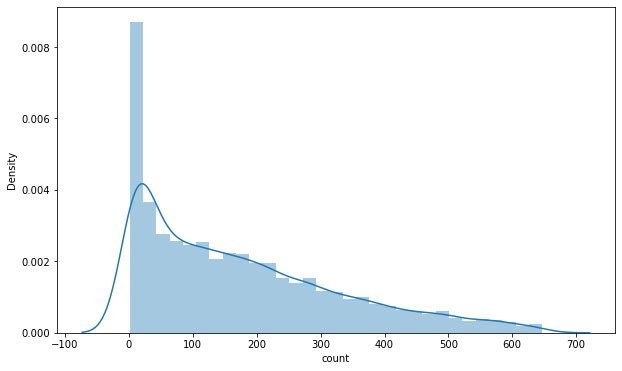

In [27]:
plt.figure(figsize=(10, 6))
graph = sns.distplot(train['count'])
skew = train['count'].skew()
kurt = train['count'].kurt()
print(f'skewness(왜도): {skew:.4f}')
print(f'kurtosis(첨도): {kurt:.4f}')

skewness(왜도): -0.9953
kurtosis(첨도): 0.2267


c:\Users\cjs98\anaconda3\envs\gang\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


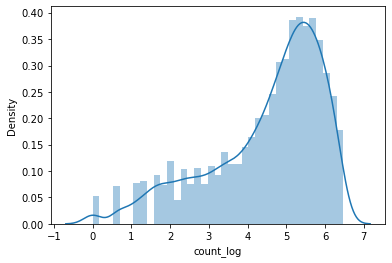

In [28]:
# log scaling을 통해 정규화

train['count_log'] = train['count'].map(lambda x: np.log(x) if x>0 else 0)
graph = sns.distplot(train['count_log'])
skew = train['count_log'].skew()
kurt = train['count_log'].kurt()
print(f'skewness(왜도): {skew:.4f}')
print(f'kurtosis(첨도): {kurt:.4f}')

In [29]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour,minute,second,dayofweek,count_log
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,16,2011,1,1,0,0,0,5,2.772589
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,40,2011,1,1,1,0,0,5,3.688879
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,32,2011,1,1,2,0,0,5,3.465736
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,13,2011,1,1,3,0,0,5,2.564949
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,2011,1,1,4,0,0,5,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10343,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,336,2012,12,19,19,0,0,2,5.817111
10344,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,241,2012,12,19,20,0,0,2,5.484797
10345,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,168,2012,12,19,21,0,0,2,5.123964
10346,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,129,2012,12,19,22,0,0,2,4.859812


### windspeed 결측치 대치

In [30]:
from sklearn.ensemble import RandomForestRegressor

def impute_windspeed(data):

    wind_0 = data[data['windspeed']==0]
    wind_not_0 = data[data['windspeed']!=0]

    cols = ['season', 'weather', 'temp', 'atemp', 'humidity', 'month', 'hour']
    reg = RandomForestRegressor()

    reg.fit(wind_not_0[cols], wind_not_0['windspeed'])
    print(reg.score(wind_not_0[cols], wind_not_0['windspeed']))

    pred_wind = reg.predict(wind_0[cols])
    wind_0['windspeed'] = pred_wind 
    data = pd.concat([wind_0, wind_not_0], axis=0)
    data['windspeed'] = data['windspeed'].astype('float')
    data.reset_index(inplace=True)
    data.drop("index", inplace=True, axis=1)

    return data

In [31]:
train = impute_windspeed(train)
test = impute_windspeed(test)

0.8975973998346141


C:\Users\cjs98\AppData\Local\Temp\ipykernel_12104\1578503200.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind_0['windspeed'] = pred_wind


0.911410648595054


C:\Users\cjs98\AppData\Local\Temp\ipykernel_12104\1578503200.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind_0['windspeed'] = pred_wind


### One-hot Encoding

In [32]:
# 범주형 변수: season, weather, holiday, workingday
train = pd.get_dummies(train, columns=['season', 'weather', 'holiday', 'workingday'])
test = pd.get_dummies(test, columns=['season', 'weather', 'holiday', 'workingday'])


In [33]:
train.columns

Index(['datetime', 'temp', 'atemp', 'humidity', 'windspeed', 'count', 'year',
       'month', 'day', 'hour', 'minute', 'second', 'dayofweek', 'count_log',
       'season_1', 'season_2', 'season_3', 'season_4', 'weather_1',
       'weather_2', 'weather_3', 'weather_4', 'holiday_0', 'holiday_1',
       'workingday_0', 'workingday_1'],
      dtype='object')

In [34]:
test.columns

Index(['datetime', 'temp', 'atemp', 'humidity', 'windspeed', 'year', 'month',
       'day', 'hour', 'minute', 'second', 'dayofweek', 'season_1', 'season_2',
       'season_3', 'season_4', 'weather_1', 'weather_2', 'weather_3',
       'weather_4', 'holiday_0', 'holiday_1', 'workingday_0', 'workingday_1'],
      dtype='object')

# Modeling

In [ ]:
# train.head()

In [ ]:
# test.head()

In [ ]:
train.drop(['datetime', 'atemp', 'minute', 'second'], axis=1, inplace=True)
test_datetime = test['datetime']
test.drop(['datetime', 'atemp', 'minute', 'second'], axis=1, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split

# array 형식으로 입력하기 위해 .values
X_train = train.drop(['count', 'count_log'], axis=1).values 
y_train = train['count_log'].values 

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

reg1 = RandomForestRegressor()

reg1.fit(X_train, y_train)
print(reg1.score(X_train, y_train))
print(reg1.score(X_val, y_val))

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

reg2 = GradientBoostingRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=5,
    random_state=42
)

reg2.fit(X_train, y_train)
print(reg2.score(X_train, y_train))
print(reg2.score(X_val, y_val))

In [ ]:
from sklearn.kernel_ridge import KernelRidge

reg3 = KernelRidge()

reg3.fit(X_train, y_train)
print(reg3.score(X_train, y_train))
print(reg3.score(X_val, y_val))

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge

reg4 = Ridge(alpha=0.5)

reg4.fit(X_train, y_train)
print(reg4.score(X_train, y_train))
print(reg4.score(X_val, y_val))

In [ ]:
from sklearn.svm import SVR 
reg5 = SVR(C=10.0, gamma='auto')

reg5.fit(X_train, y_train)
print(reg5.score(X_train, y_train))
print(reg5.score(X_val, y_val))

In [ ]:
from sklearn.ensemble import VotingRegressor

reg_vot = VotingRegressor(
    estimators=[
        ('rf', reg1),
        ('gbdt', reg2)
    ]
)

reg_vot.fit(X_train, y_train)
print(reg_vot.score(X_train, y_train))
print(reg_vot.score(X_val, y_val))

# 예측

In [ ]:
pred = reg_vot.predict(test)

In [ ]:
sub = pd.read_csv('./sampleSubmission.csv')
sub

In [ ]:
submission = pd.DataFrame()
submission['datetime'] = test_datetime 
submission['count_log'] = pred

In [ ]:
submission

In [ ]:
# log취한것 원래대로 
submission['count'] = np.exp(submission['count_log'])
submission.drop('count_log', axis=1, inplace=True)
submission.head()

In [ ]:
submission.to_csv("Bike.csv", index = False)